# Importing Datasets

In [1]:
#importing libraries and datasets

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
salary_df = pd.read_csv("Salary_Data.csv")

In [2]:
#checking
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### EDA and Data Visualization

In [3]:
salary_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

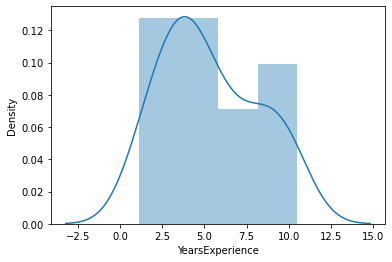

In [4]:
sns.distplot(salary_df['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

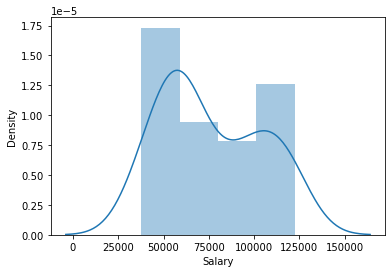

In [5]:
sns.distplot(salary_df['Salary'])

### Correlation Analysis


In [6]:
salary_df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [7]:
#it has high correlation so we can move forward

#Renaming column so it will be easy to call
salary_df=salary_df.rename(columns={'YearsExperience': 'exp','Salary': 'sal' })
#checking
salary_df.head()

,exp,sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<AxesSubplot:xlabel='exp', ylabel='sal'>

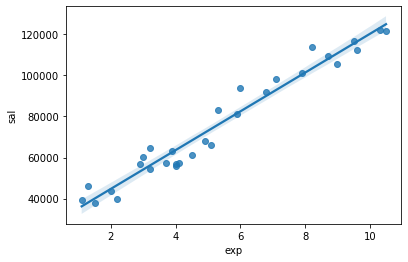

In [8]:
sns.regplot(x=salary_df['exp'],y=salary_df['sal'])

In [9]:
#Fitting a Linear Regression Model
import statsmodels.formula.api as smf
model=smf.ols("sal~exp",data=salary_df).fit()

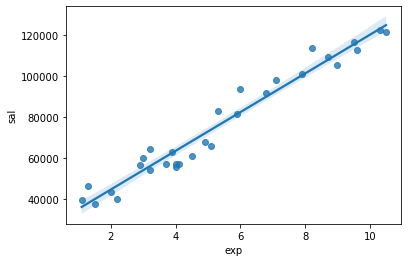

In [10]:
sns.regplot(x="exp", y="sal", data=salary_df);#regplot() method is used to plot data and a linear regression model fit

In [11]:
#Coefficients
model.params

Intercept    25792.200199
exp           9449.962321
dtype: float64

In [12]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept    11.346940
exp          24.950094
dtype: float64 
 Intercept    5.511950e-12
exp          1.143068e-20
dtype: float64


In [13]:
#R squared values without any transformation
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [14]:
X_log = np.log(salary_df['exp'])
Y_log = np.log(salary_df['sal'])
X_sqrt = np.sqrt(salary_df['exp'])
Y_sqrt = np.sqrt(salary_df['sal'])

In [15]:
salary_df['log_years_of_experience'] = X_log
salary_df['log_salary'] = Y_log
salary_df['sqrt_years_of_experience'] = X_sqrt
salary_df['sqrt_salary'] = Y_sqrt

In [16]:
salary_df.head()

,exp,sal,log_years_of_experience,log_salary,sqrt_years_of_experience,sqrt_salary
0,1.1,39343.0,0.095310,10.580073,1.048809,198.350700
1,1.3,46205.0,0.262364,10.740843,1.140175,214.953483
2,1.5,37731.0,0.405465,10.538237,1.224745,194.244691
3,2.0,43525.0,0.693147,10.681091,1.414214,208.626460
4,2.2,39891.0,0.788457,10.593906,1.483240,199.727314


In [17]:
model_log_x = smf.ols("sal~log_years_of_experience",data = salary_df).fit()
print(model_log_x.tvalues, '\n' ,model_log_x.pvalues)
(model_log_x.rsquared,model_log_x.rsquared_adj)#rsquared value using log transformation on input variable

Intercept                   2.895135
log_years_of_experience    12.791989
dtype: float64 
 Intercept                  7.268813e-03
log_years_of_experience    3.250155e-13
dtype: float64


(0.853888882875697, 0.8486706286926862)

In [26]:
model_log_y = smf.ols("log_salary~exp",data = salary_df).fit()
print(model_log_y.tvalues, '\n' ,model_log_y.pvalues)
(model_log_y.rsquared,model_log_y.rsquared_adj)#rsquared value using log transformation on target variable

Intercept    273.327166
exp           19.584833
dtype: float64 
 Intercept    1.604634e-49
exp          7.027439e-18
dtype: float64


(0.9319671194084196, 0.929537373673006)

In [19]:
model_log_x_y = smf.ols("log_salary~log_years_of_experience",data = salary_df).fit()
print(model_log_x_y.tvalues, '\n' ,model_log_x_y.pvalues)
(model_log_x_y.rsquared,model_log_x_y.rsquared_adj)#rsquared value using log transformation on target and input variable'

Intercept                  184.867959
log_years_of_experience     16.352542
dtype: float64 
 Intercept                  9.073132e-45
log_years_of_experience    7.395278e-16
dtype: float64


(0.905215072581715, 0.9018298966024905)

In [20]:
model_sqrt_x = smf.ols("sal~sqrt_years_of_experience",data = salary_df).fit()
print(model_sqrt_x.tvalues, '\n' ,model_sqrt_x.pvalues)
(model_sqrt_x.rsquared,model_sqrt_x.rsquared_adj)#rsquared value using square root transformation on input variable

Intercept                   -3.262308
sqrt_years_of_experience    19.437148
dtype: float64 
 Intercept                   2.906965e-03
sqrt_years_of_experience    8.565358e-18
dtype: float64


(0.9310009544993526, 0.9285367028743294)

In [21]:
model_sqrt_y = smf.ols("sqrt_salary~exp",data = salary_df).fit()
print(model_sqrt_y.tvalues, '\n' ,model_sqrt_y.pvalues)
(model_sqrt_y.rsquared,model_sqrt_y.rsquared_adj)#rsquared value using square root transformation on target variable

Intercept    40.646251
exp          23.025247
dtype: float64 
 Intercept    1.920194e-26
exp          9.782891e-20
dtype: float64


(0.9498353533865289, 0.9480437588646192)

In [22]:
model_sqrt_x_y = smf.ols("sqrt_salary~sqrt_years_of_experience",data = salary_df).fit()
print(model_sqrt_x_y.tvalues, '\n' ,model_sqrt_x_y.pvalues)
(model_sqrt_x_y.rsquared,model_sqrt_x_y.rsquared_adj)
#rsquared value using square root transformation on both target and input variable

Intercept                   12.663496
sqrt_years_of_experience    21.315126
dtype: float64 
 Intercept                   4.141645e-13
sqrt_years_of_experience    7.584326e-19
dtype: float64


(0.9419490138976825, 0.9398757643940283)

### The R square value with square root transformation on target variable is the highest, it explains 94% variation  

In [23]:
#Predict salary for 13 and 20 years of experience
newdata=pd.Series([13,20])

In [24]:
data_pred=pd.DataFrame(newdata,columns=['exp'])

In [25]:
model.predict(data_pred)

0    148641.710378
1    214791.446628
dtype: float64